# Cars4U Project - Student = Yoel Lapin

### Background & Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


Topics Index

- <a href = #link1>Import Python libraries and acquire the data set</a>
- <a href = #link2> Basic EDA (Exploratory Data Analysis)</a>
- <a href = #link3> Data preprocessing , conversion</a>
- <a href = #link4> Data preprocessing ; dropping records and columns, inserting to nulls </a>
- <a href = #link5> Data preprocessing ; dummies </a>
- <a href = #link6> Univariable analysis</a>
- <a href = #link7> Bivariate and Multivariate Analysis</a>
- <a href = #link8> Basic summary statistics fixes (E.g. outliers, etc)</a>
- <a href = #link9> Linear regressions</a>
- <a href = #link10>Linear regressions, model improvement </a>
- <a href = #link11>Conclusions and wrap up</a>
 

 
# <a name='link1'>Import Python libraries and acquire the data set </a>

Set the environment for the Exploratory Data Analysis

In [1]:
# basic and math packages
import numpy as np   
import pandas as pd    

# graphical pakages 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures # it generates polynomial and interaction features
from sklearn import linear_model # for Ordinary least squares Linear Regression
from sklearn.linear_model import LinearRegression # package for linear regression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler # StandardScaler transforms your data such that its 
# distribution will have a mean value 0 and standard deviation of 1 , 
# and MinMaxScaler to subtract the minimum value in the feature and then divides by the range.
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import OneHotEncoder # Encode categorical integer features using a one-hot aka one-of-K scheme
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To check model performance

from scipy.stats import tmean # it calculates the mean/average of the given list of numbers
import statsmodels.api as sm # package for the statistical models in case needed, explore data, estimate statistical models,
# and perform statistical tests


In [2]:
# Data acquisition 
car = pd.read_csv ('used_cars_data.csv')

# <a name='link2'>Basic EDA (Exploratory Data Analysis)</a>

Perform the first tasks to explore and understand the dataset characteristics 

In [3]:
# Check number of records and columns 
car.shape 

(7253, 14)

In [4]:
# Check the data types and number of null values 
car.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
# Anything to learn from the numerical columns ?
car.describe ()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


Conclusions:
   - It looks many cars having 5 seats
   -  Price is having a high range of values


In [6]:
# Perform basic dataset visual inspection
np.random.seed(1)
car.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [7]:
# looking at which columns have the most missing values
car.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64


Insight :
    
   -  New price has a large majority of null values, it may not be useful


In [8]:
# Count for unique values 
car.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Conclusion:
- Car names are having many values, look for a way to reduce the unique values

    

# <a name='link3'>Data preprocessing , conversion</a>

After looking into data chararcteristics and structure let procced with cleaning/cleansing, data preparation, data scrubbing



#### Convert categorical values into numbers    
Convert mileage into nbr , convert scales  DONE    
Convert engine into nbr  DONE   
Convert power into nbr     DONE      
Convert new_price into nbr , conversion rate as well    DONE     
Only car manufacturer as first word    DONE    


In [9]:
# Create a duplicate dataset for data preprocessing but save the baseline in case of future validation or troubleshooting
car1 = car.copy()
car1.head ()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
# How big is the mileage coversion issue? Km/kg and kmlp are different scales ?
kmkg = 0
kmpl = 0
for i in car1.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg - Kilometers/Kilogram : {} '.format(kmkg))
print('The number of rows with kmpl - Kilometers Per Litre : {} '.format(kmpl))

The number of rows with Km/Kg - Kilometers/Kilogram : 74 
The number of rows with kmpl - Kilometers Per Litre : 7177 


In [11]:
''' 
FAQ
How to convert Mileage from kmpl to km/kg?
kmpl and km/kg are units associated with different types of fuel, 
but both the units refer to the distance covered (in km) per unit of fuel. 
So, there is no need to convert between them. The units can be stripped off and the numerical values can be used as they are.

'''

#Convert Mileage to  float while deleting the ending string
car1['Mileage'] = car1['Mileage'].str.replace(r'\D', '').astype(float) # removes non-digits.

#Checking Mileage became a float
car1["Mileage"].describe()

count    7251.000000
mean      854.206454
std       860.930796
min         0.000000
25%       173.000000
50%       229.000000
75%      1701.000000
max      3354.000000
Name: Mileage, dtype: float64

In [12]:

# Convert Engine into float64, let split it first
Engine_columns = car1["Engine"].str.split(" ", n = 1, expand = True) 
Engine_columns.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [13]:
# Drop the old column  
car1.drop(['Engine'], axis=1, inplace=True)
car1["Normalized_Eng"]= Engine_columns[0]   

# Validate the task was completed right

car1.head ()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,New_Price,Price,Normalized_Eng
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16 bhp,5.0,NaN,1.75,998
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967.0,126.2 bhp,5.0,NaN,12.50,1582
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182.0,88.7 bhp,5.0,8.61 Lakh,4.50,1199
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76 bhp,7.0,NaN,6.00,1248
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.8 bhp,5.0,NaN,17.74,1968


In [14]:
# Convert Normalized_Eng new column into float 
car1['Normalized_Eng'] = car1['Normalized_Eng'].astype(np.float64)

# Validate if the attribute is float64
car1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Normalized_Eng     7207 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 793.4+ KB


In [15]:
# Handling Power, two steps:  take care of nan and nulls ,conversion to float last


# Conversion function
def normalize_power(power_val):
    """This function takes in a string power and converts it to a number.
    Otherwise this function just returns np.nan."""
    if isinstance(power_val, str):  # checks if `power` is a string
        if power_val.startswith("null"):
            return np.nan        
        if power_val.endswith("bhp"):
            return (power_val.replace("bhp", ""))
    else:  # this happens when the power is np.nan
        return np.nan


# Execute function 

car1["Power"] = car1["Power"].apply(normalize_power)

# Check it works 
car1.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,New_Price,Price,Normalized_Eng
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,NaN,1.75,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967.0,126.2,5.0,NaN,12.50,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182.0,88.7,5.0,8.61 Lakh,4.50,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,NaN,6.00,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.8,5.0,NaN,17.74,1968.0


In [16]:
# Convert Power column into float
car1['Power'] = car1['Power'].astype(np.float64)

# Validate conversion 
car1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Normalized_Eng     7207 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [17]:
# Split the column Price
Engine_columns = car1["New_Price"].str.split(" ", n = 1, expand = True) 
Engine_columns.head()

,0,1
0,NaN,NaN
1,NaN,NaN
2,8.61,Lakh
3,NaN,NaN
4,NaN,NaN


In [18]:
# Drop the original column and replace with new one 
car1.drop(['New_Price'], axis=1, inplace=True)
car1["Norm_New_Price"]= Engine_columns[0]   
car1.head ()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Norm_New_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,NaN


In [19]:
# Conversion function 
def normalize_new_price (new_price_val):
    """This function takes in a string new price and converts it to a number.  
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(new_price_val, str):  # checks if `new price` is a string
        multiplier = 1  # handles conversions
        if new_price_val.endswith("Cr"):
            multiplier = 100
        return float(new_price_val.replace("Cr", "").replace("Lakhs", "")) * multiplier
    else:  # this happens when the new price is not having Cr or Lakhs
        return np.nan

In [20]:
# Execute function 

car1["Norm_New_Price"] = car1["Norm_New_Price"].apply(normalize_new_price)
 
# Validate the data 

car1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Norm_New_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,NaN


In [21]:
# Looking for the manufacturer name only, too many models

name_columns = car1["Name"].str.split(" ", n = 1, expand = True) 
np.random.seed(1)
name_columns.sample(n=10)
 


,0,1
2397,Ford,EcoSport 1.5 Petrol Trend
3777,Maruti,Wagon R VXI 1.2
4425,Ford,Endeavour 4x2 XLT
3661,Mercedes-Benz,E-Class E250 CDI Avantgrade
4514,Hyundai,Xcent 1.2 Kappa AT SX Option
599,Toyota,Innova Crysta 2.8 ZX AT
186,Mercedes-Benz,E-Class E250 CDI Avantgrade
305,Audi,A6 2011-2015 2.0 TDI Premium Plus
4582,Hyundai,i20 1.2 Magna
5434,Honda,WR-V Edge Edition i-VTEC S


In [22]:
# Drop the original column and replace with new one 
car1.drop(['Name'], axis=1, inplace=True)
car1["Manufacturer_name"]= name_columns[0]   
car1.head ()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Norm_New_Price,Manufacturer_name
0,0,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,NaN,Maruti
1,1,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,NaN,Hyundai
2,2,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,8.61,Honda
3,3,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,NaN,Maruti
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,NaN,Audi


In [23]:
# count for unique values , validate the names assumption
name_columns.nunique()

0      33
1    2041
dtype: int64

The name was reduced from 2041 to 33 variations, a significant improvement. 

# <a name='link4'>Data preprocessing ; dropping records and columns, inserting to nulls</a>

Drop new price, too many missing values DONE      
Drop index column, not meaningful data  DONE       
How to treat null values and why?         
    - Drop records if Price missing, dependent variable Y    DONE      
    - Drop  records if Seats missing   DONE   
    - Drop  records if Mileage missing   DONE 
    - Average imputation if Power missing   DONE    
    - No need to handle others due to being resolved by the above     DONE 

     


In [24]:
# Too many missing values, let drop the column
car1.drop(['Norm_New_Price'], axis=1, inplace=True)
car1.head ()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Manufacturer_name
0,0,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,Maruti
1,1,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,Hyundai
2,2,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,Honda
3,3,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,Maruti
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,Audi


In [25]:
# Not important column, dropping as it's just an index
car1.drop(['S.No.'], axis=1, inplace=True)
car1.head ()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Manufacturer_name
0,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,Audi


In [26]:
# Compare the baseline dataset vs. the transformed one

print ('Car dataset -> ' , car.shape)
 
print ('Car1 dataset -> ', car1.shape)
 

Car dataset ->  (7253, 14)
Car1 dataset ->  (7253, 12)


In [27]:
# how many nulls exist ?
car1.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Normalized_Eng         46
Mileage                 2
Manufacturer_name       0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
dtype: int64

In [28]:
# Drop records if price is missing  as it's the Y variable  

nan_value = float("NaN")
car1.replace("", nan_value, inplace=True)

car1.dropna(subset = ["Price"], inplace=True)

In [29]:
# check if relevant nulls records are deleted 
car1.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Normalized_Eng        36
Mileage                2
Manufacturer_name      0
Price                  0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64

In [30]:
# Drop records if Mileage is missing  , only 2 records 

nan_value = float("NaN")
car1.replace("", nan_value, inplace=True)

car1.dropna(subset = ["Mileage"], inplace=True)

In [31]:
# check if relevant nulls records are deleted 
car1.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Normalized_Eng        36
Manufacturer_name      0
Price                  0
Mileage                0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64

In [32]:
# Drop records if Seats missing

nan_value = float("NaN")
car1.replace("", nan_value, inplace=True)

car1.dropna(subset = ["Seats"], inplace=True)

In [33]:
# check if relevant nulls records are deleted 
car1.isnull().sum().sort_values(ascending=False)

Power                103
Manufacturer_name      0
Normalized_Eng         0
Price                  0
Seats                  0
Mileage                0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64


 It looks while deleting the records with "Seats" values missing, only Power left with missing values

In [34]:
# Let add the average Power for null values
 

car1['Power'].fillna(car1['Power'].mean(), inplace=True)  # mean imputation
 

In [35]:
# check if no missings left
car1.isnull().sum().sort_values(ascending=False)

Manufacturer_name    0
Normalized_Eng       0
Price                0
Seats                0
Power                0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
dtype: int64

In [36]:
# Let check the variables types + missings together 
car1.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   float64
 7   Power              5975 non-null   float64
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
 10  Normalized_Eng     5975 non-null   float64
 11  Manufacturer_name  5975 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


Replacing missings with the mean by manufacturer function prepared but not used after the “Seats” clean-up records removed the records.

 

car1['Normalized_Eng'] = car1['Normalized_Eng'].fillna(car1.groupby("Manufacturer_name").transform("mean"))     
car1['Power'] = car1['Power'].fillna(car1.groupby("Manufacturer_name").transform("mean"))


Last inputting power avg. into the Power missing values can create bias, but the number of records was small - 103/5975. 


# <a name='link5'>Data preprocessing ; dummies</a>


Location a column 0 or 1  , dummies   DONE    
Car manufacturer 0 or 1  , dummies DONE 

In [37]:
# Create another duplicate dataset for data preprocessing, after applying dummies some variable analysis won't be feasible
car2 = car1.copy()
car2.head ()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Normalized_Eng,Manufacturer_name
0,Mumbai,2010,72000,CNG,Manual,First,266.0,58.16,5.0,1.75,998.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,1967.0,126.20,5.0,12.50,1582.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,182.0,88.70,5.0,4.50,1199.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,88.76,7.0,6.00,1248.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,140.80,5.0,17.74,1968.0,Audi


In [38]:
# create dummies Location and Manufacturer_name
car2 = pd.get_dummies(car2, columns=["Location", "Manufacturer_name", "Fuel_Type", "Transmission", "Owner_Type"], drop_first=True)
np.random.seed(1)
car2.sample(n=10)

,Year,Kilometers_Driven,Mileage,Power,Seats,Price,Normalized_Eng,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Manufacturer_name_Toyota,Manufacturer_name_Volkswagen,Manufacturer_name_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4912,2016,52553,1967.0,126.20,5.0,12.26,1582.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1754,2017,15000,217.0,67.00,5.0,4.25,999.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2991,2008,66000,197.0,46.30,5.0,1.70,796.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3076,2013,92000,1299.0,100.00,8.0,12.50,2494.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2595,2019,15379,2384.0,83.83,5.0,6.97,1199.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3521,2009,98000,135.0,282.00,5.0,25.00,2987.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1690,2018,40129,1157.0,254.79,5.0,70.80,2987.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4854,2015,16329,1927.0,170.00,5.0,30.30,2143.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1382,2009,120000,189.0,67.10,5.0,1.69,998.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2902,2015,25470,2073.0,91.10,5.0,5.90,1373.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [39]:
# Compare the baseline dataset vs. the transformed ones

print ('Car dataset -> ' , car.shape)
 
print ('Car1 dataset -> ', car1.shape)

print ('Car2 dataset -> ', car2.shape)
 

Car dataset ->  (7253, 14)
Car1 dataset ->  (5975, 12)
Car2 dataset ->  (5975, 54)


Car original dataset baseline.   
Car1 dataset cleaned up with the max quantity of numerical values but without applying dummies, useful for data visualization and variable analysis.   
Car2 dataset, ready to use for statistical analysis and linear regression.  


# <a name='link6'>Univariable analysis</a>
 

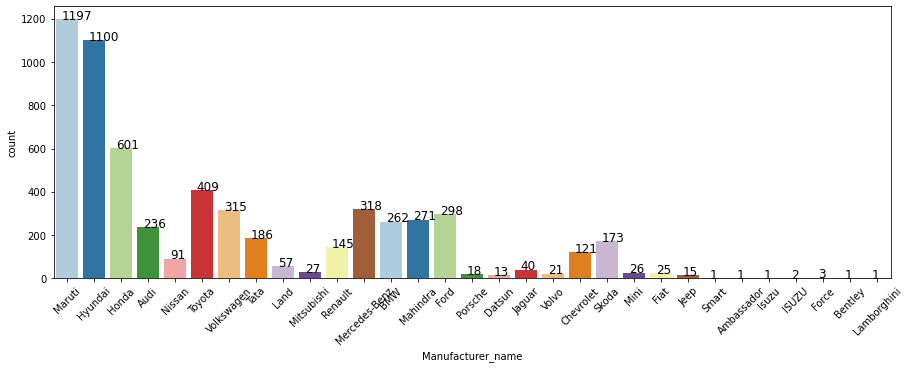

In [40]:
 # Function to create barplots that indicate count for category.


def count_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data=data, x=z, palette="Paired")
    for p in ax.patches:
        percentage = p.get_height()  # count of each class of the category
        x = p.get_x() + p.get_width() / total + 0.2  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percentage
    plt.show()  # show the plot
    
    
# Count number of cars by manufacturer, even the dataset is a sample
 
 count_on_bar(car1, "Manufacturer_name")

The top 4 manufacturers are Maruti, Hyundai, Honda and Toyota.    
Isuzu is written in too different ways. 

In [41]:
# Let fix the Isuzu name by replace 
car1["Manufacturer_name_fixed"] = car1["Manufacturer_name"].str.replace("Isuzu", "ISUZU")

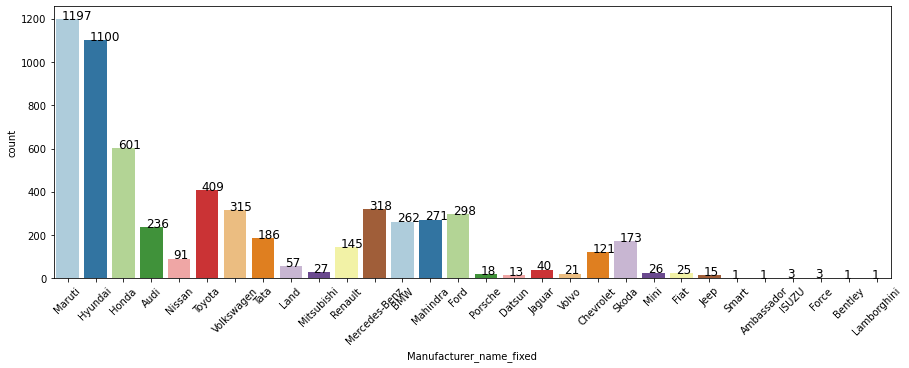

In [42]:
# Let validate the fix 
count_on_bar(car1, "Manufacturer_name_fixed")

The fix works, not fixing the issue for car2 as only 2 records and minimal impact

In [1]:
# Count number cars and % by owner

ms_count = car1.groupby("Owner_Type")["Owner_Type"].count()
ms_count
ms_count.plot.pie(autopct="%.1f%%");

NameError: name 'car1' is not defined

Most of the owners are first and followed by second owners. 

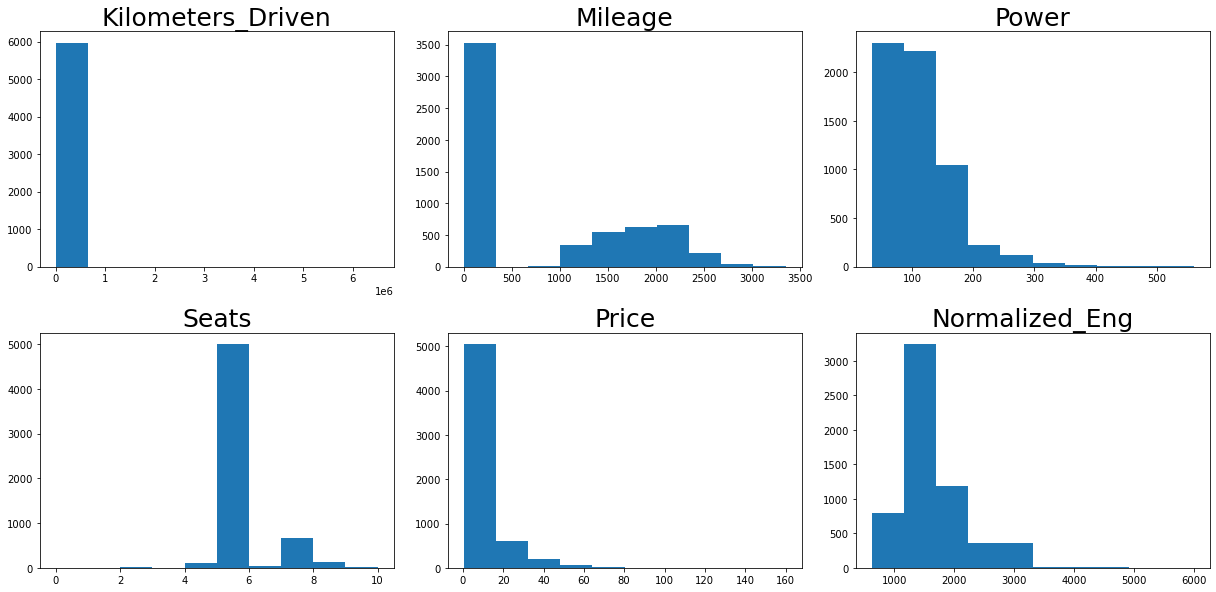

In [44]:
# lets plot histogram of all numerical variables


all_col = car1.select_dtypes(include=np.number).columns.tolist()
all_col.remove("Year")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(car1[all_col[i]])
    # sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

Conclusions: 
- Kilometers_driven having many zeros
- Price is left-skewed
- Most cars are standard with 5 seats
- Let continue with Bivariate and Multivariate Analysis to find more interesting insights



# <a name='link7'>Bivariate and Multivariate Analysis</a>

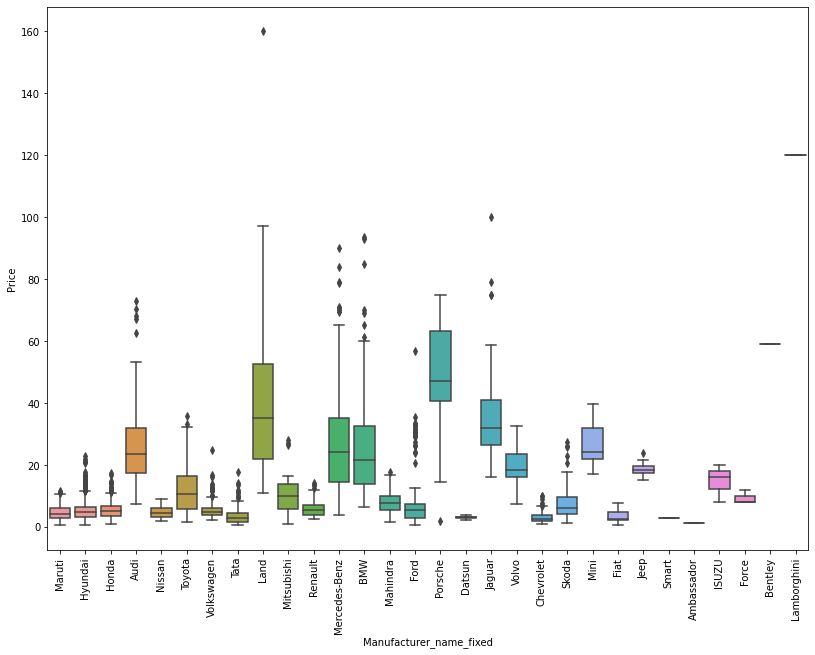

In [45]:
# Let check the prices ranges by manufacturer
plt.figure(figsize=(30, 10))


plt.subplot(1, 2, 2)
sns.boxplot(data=car1, y="Price", x="Manufacturer_name_fixed")
plt.xticks(rotation=90)

plt.show()

The biggest price variances are for Land (Land Rover), Mercedes-Benz, Jaguar, BMW, Porsche, Audi. As well these manufacturers prices are higher compare to the rest. 

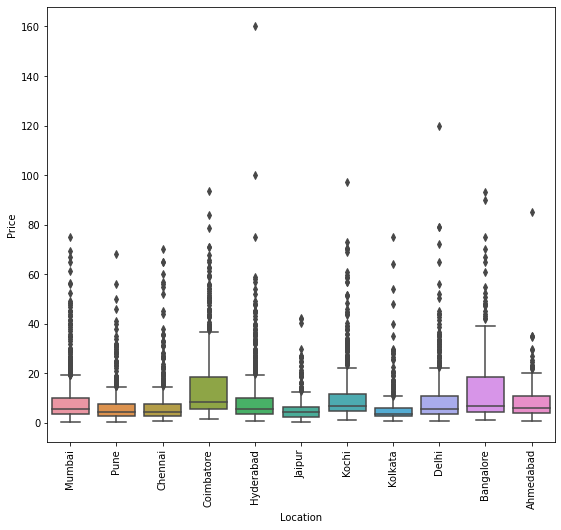

In [46]:

# Let check the prices ranges by location
plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 2)
sns.boxplot(data=car1, y="Price", x="Location")
plt.xticks(rotation=90)

plt.show()

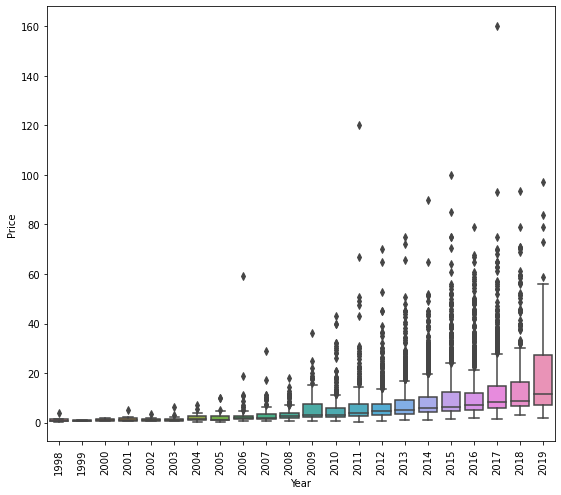

In [47]:

# Let check the prices ranges by Year
plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 2)
sns.boxplot(data=car1, y="Price", x="Year")
plt.xticks(rotation=90)

plt.show()

It looks like price by location is not changing a lot, but many outliers.      
But as the car is more recent the price ranges increase.    
Let check across the board possible correlations by using plots and a heatmap.   



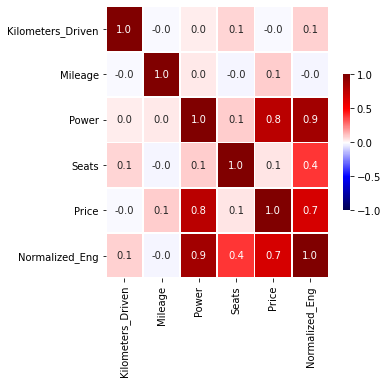

In [48]:
# Create heatmap

numeric_columns = car1.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable
corr = (
    car1[numeric_columns].corr()
)  # sorting correlations Price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

It looks price and engine have some level of correlation: 0.7, power is correlating with price and engine (0.8 and 0.9 respectively)  and then engine with the number of seats: 0.4.  

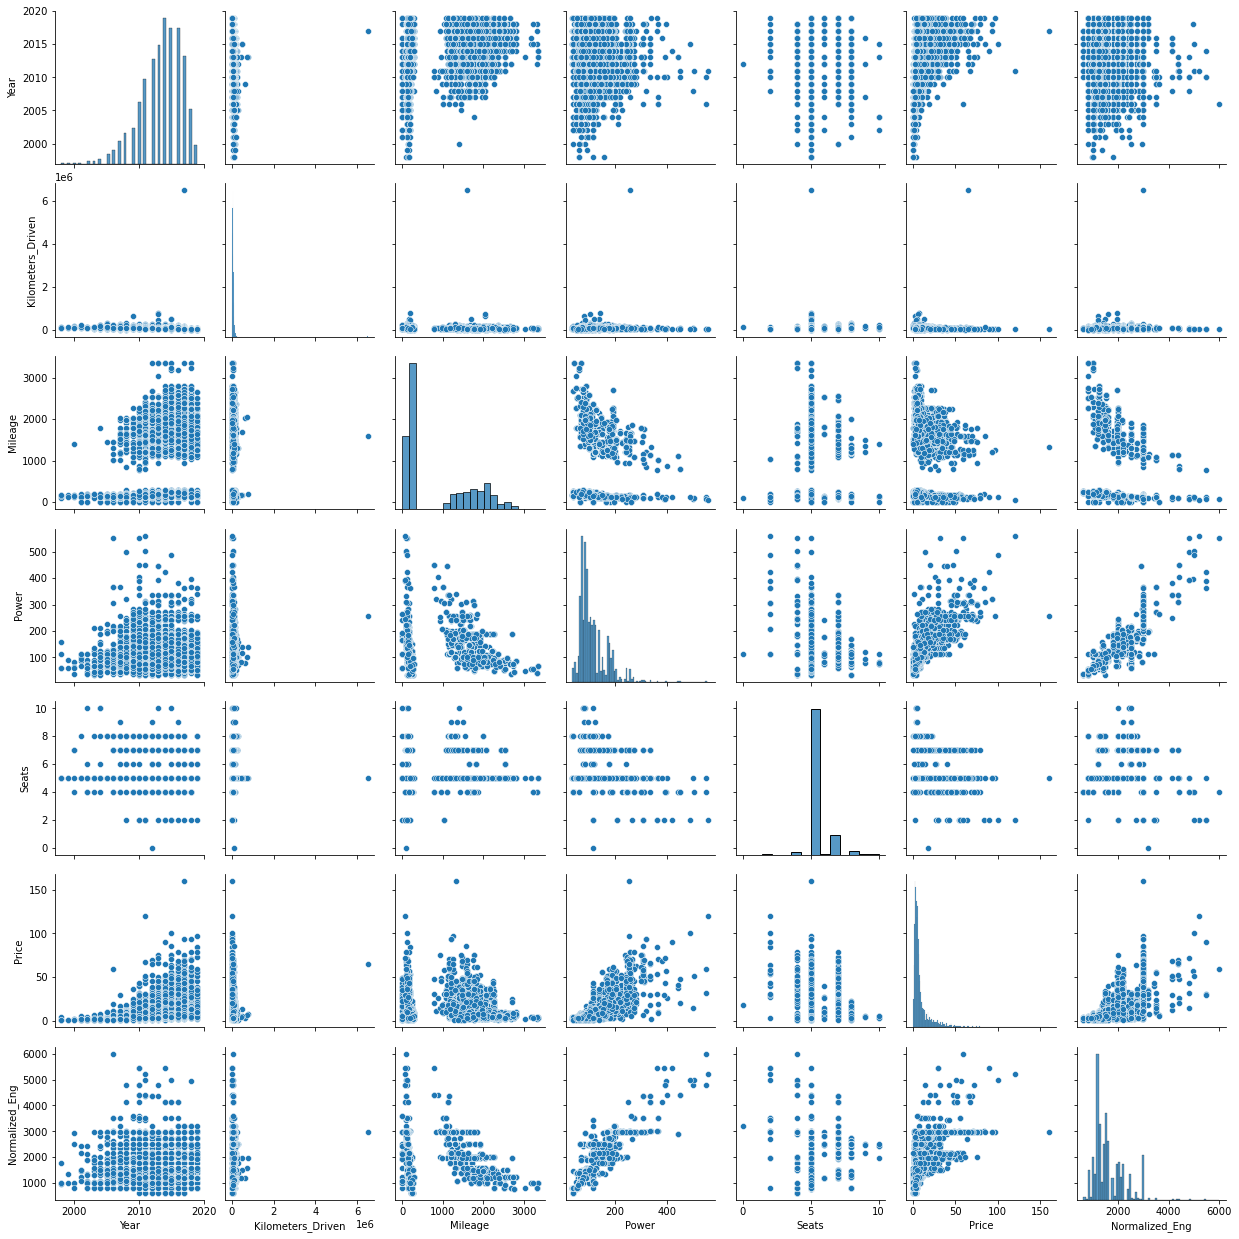

In [49]:
# Create plots for possible correlation recognition
sns.pairplot(car1)

Some conclusions from the above:
    
- Higher prices for more recent years
- Price is left-skewed 
- Mileage has very low values and then like a normal distribution
- Power has a positive correlation with price and engine, and negative with Mileage when the values are higher



 

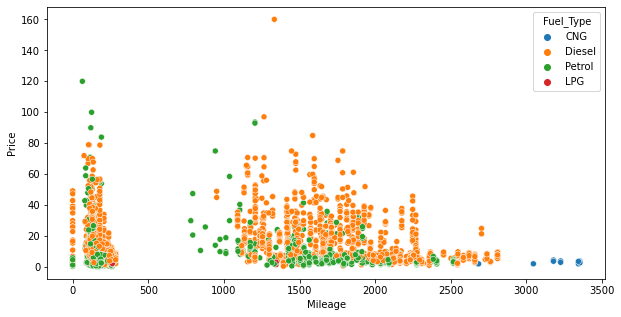

In [50]:
# Check the fuel type correted to Mileage and Price

plt.figure(figsize=(10, 5))
sns.scatterplot(y="Price", x="Mileage", hue="Fuel_Type", data=car1)

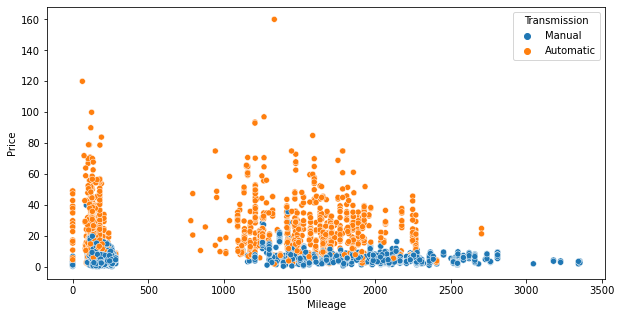

In [51]:
# Check the Transmission correted to Mileage and Price

plt.figure(figsize=(10, 5))
sns.scatterplot(y="Price", x="Mileage", hue="Transmission", data=car1)


Conclusions:
    - Manual transmission is cheaper than automatic regardless of the mileage
    - It's not clear more mileage reduce the price, but maybe




# <a name='link8'> Basic summary statistics fixes (E.g. outliers,  etc)</a>

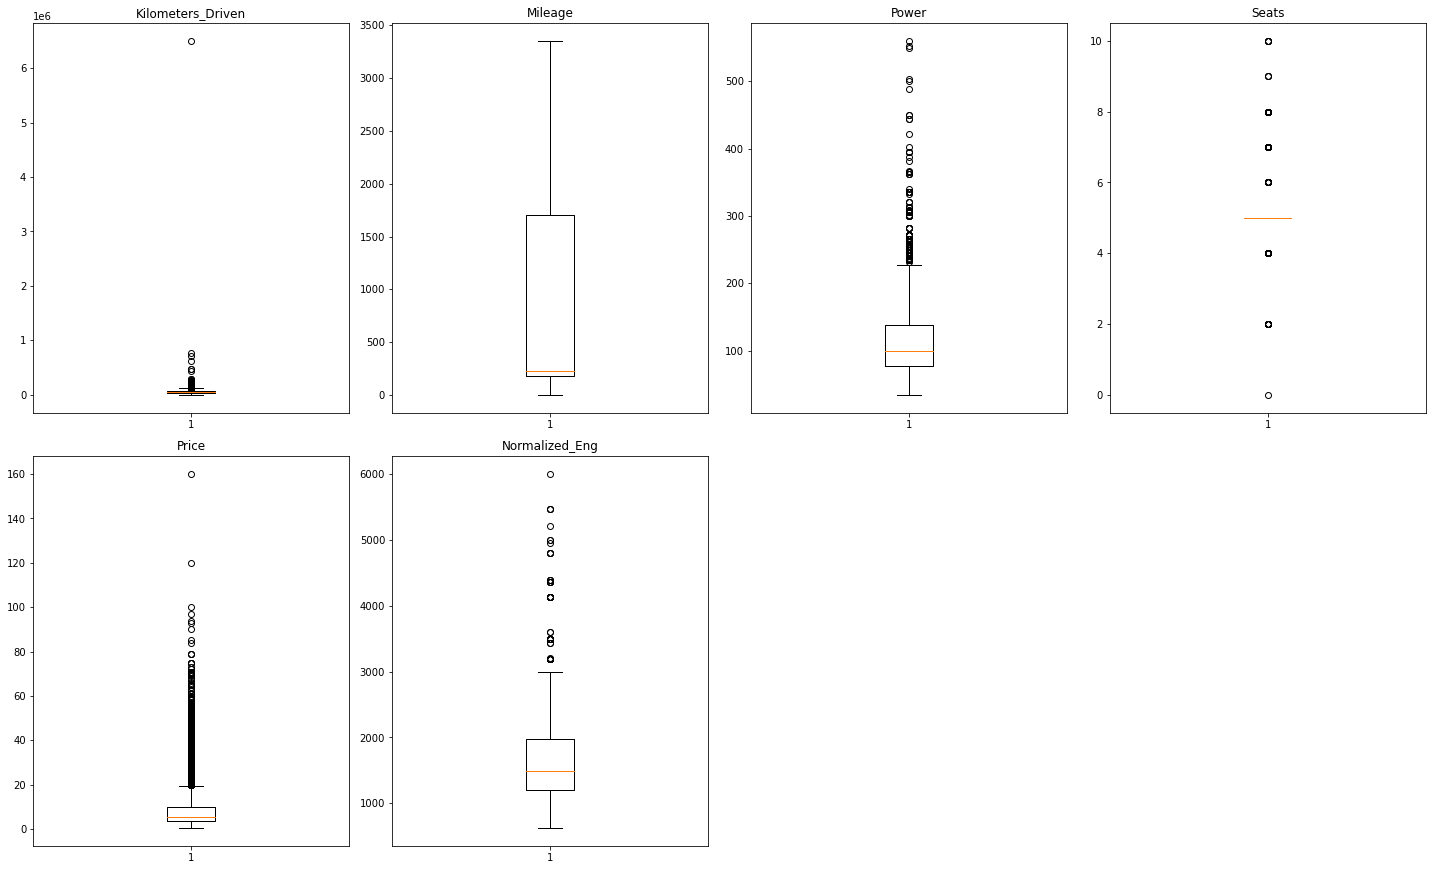

In [52]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

    
plt.show()

Outliers finding:
  -  Price is having many high outliers and Engine as well but less.
  -  Mileage driven is having many 0 values, and as well as having some high outliers.



In [53]:
# Let's treat outliers by flooring and capping, we used car2 dataset now
def treat_outliers(car2, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    car2: dataframe
    col: name of the column
    """
    Q1 = car2[col].quantile(0.25)  # 25th quantile
    Q3 = car2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    car2[col] = np.clip(car2[col], Lower_Whisker, Upper_Whisker)

    return car2


def treat_outliers_all(car2, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    car2: data frame
    """
    for c in col_list:
        car2 = treat_outliers(car2, c)

    return car2

In [54]:
# Let run the outlier treat function
numerical_col = car2.select_dtypes(include=np.number).columns.tolist()
car2 = treat_outliers_all(car2, numerical_col)

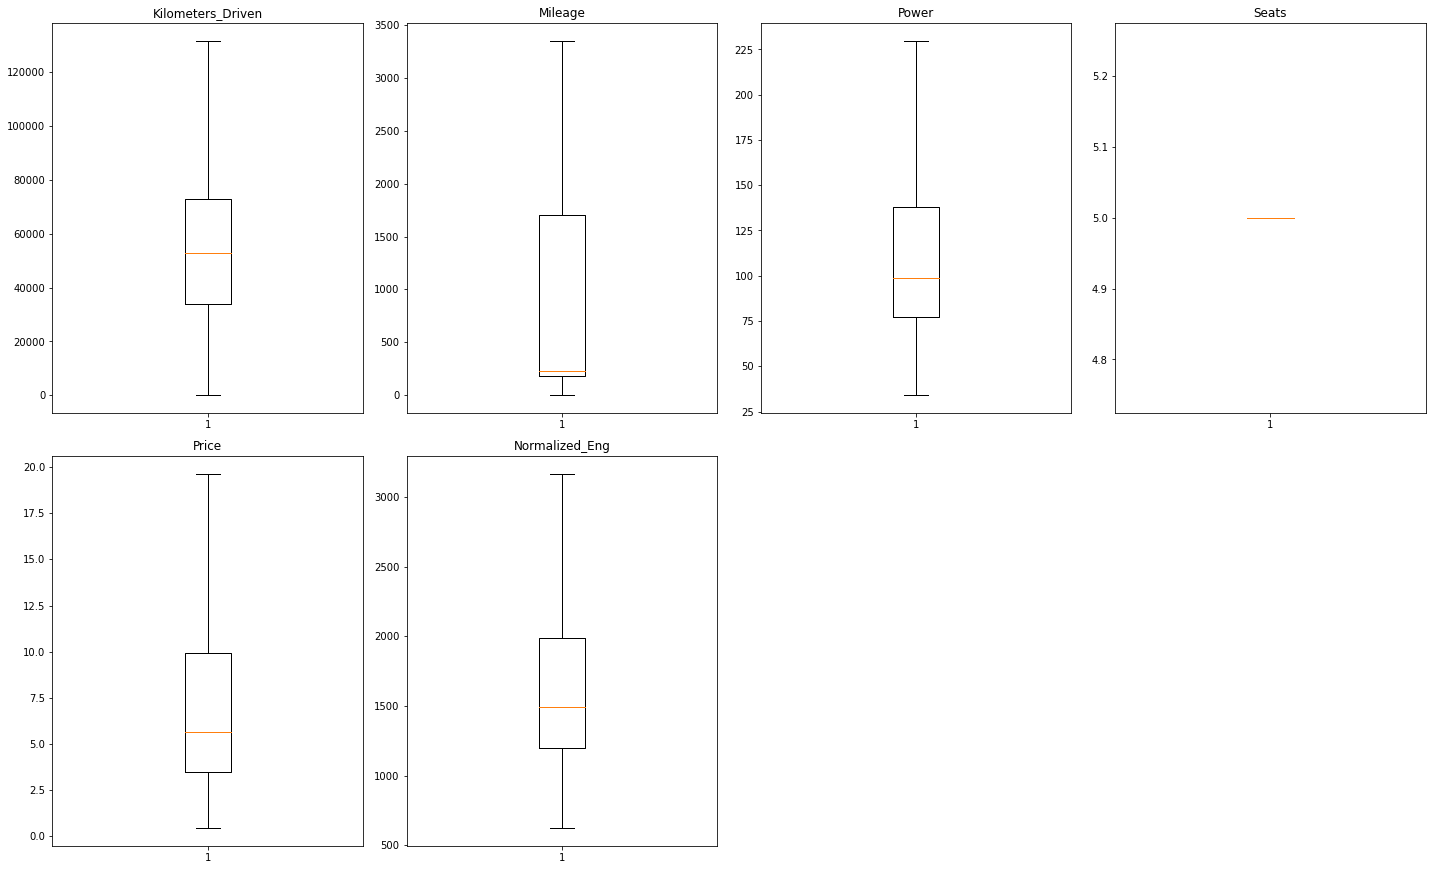

In [55]:
# let look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We can see outliers were taken care of.


# <a name='link9'>Linear regressions</a>


The dependent variable the business is willing to predict is the price, so this is the Y variable and the others are dependents as X variables in our model.


In [56]:
# defining x and y variables


x = car2.drop(["Price"] , axis=1)
y = car2[["Price"]]

print(x.head())
print(y.head())

   Year  Kilometers_Driven  Mileage   Power  Seats  Normalized_Eng  \
0  2010              72000    266.0   58.16    5.0           998.0   
1  2015              41000   1967.0  126.20    5.0          1582.0   
2  2011              46000    182.0   88.70    5.0          1199.0   
3  2012              87000   2077.0   88.76    5.0          1248.0   
4  2013              40670    152.0  140.80    5.0          1968.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                   0                 0                    0               0   
1                   0                 0                    0               0   
2                   0                 0                    0               0   
3                   0                 0                    0               0   
4                   0                 0                    0               0   

   ...  Manufacturer_name_Toyota  Manufacturer_name_Volkswagen  \
0  ...                         0

In [57]:
# Check the dateset size
print(x.shape)
print(y.shape)

(5975, 53)
(5975, 1)


In [58]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [59]:
# Fitting the model on the train data (0.7 of the data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [60]:
# let us check the coefficients and intercept of the model

coef_car2 = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_car2

,Coefficients
Year,6.000641e-01
Kilometers_Driven,-1.121767e-05
Mileage,6.555862e-05
Power,6.242141e-02
Seats,-1.379452e-14
Normalized_Eng,1.644820e-03
Location_Bangalore,0.000000e+00
Location_Chennai,0.000000e+00
Location_Coimbatore,0.000000e+00
Location_Delhi,0.000000e+00


In [61]:
# defining function for MAPE

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [62]:
# Checking model performance on train set (seen 0.7 of the data)
print("Train Performance below\n")
model_perf(linearregression, x_train, y_train)

Train Performance below



,MAE,MAPE,RMSE,R^2
0,1.764313,37.423162,2.334237,0.837399


In [63]:
# Checking model performance on test set (unseen 0.3 of the data)
print("Test Performance below\n")
model_perf(linearregression, x_test, y_test)

Test Performance below



,MAE,MAPE,RMSE,R^2
0,1.8044,38.777222,2.45772,0.815087


Takeaways:   
    - The model can explain 81% of the data, it's pretty good  
    - Intercept ~1.2  
    - R^2 result of test data is lower compare to the test ones, ~0.81 vs. ~0.84  
    - MAE, test data indicates we can predict price with ~1.8 within the mean error   
    - MAPE on the test set suggests we can predict  ~38% of the price, we need to dig into the details of OLS to fix this.It should have a lower value : MAPE < 5% excellent or MAPE < 10% good



## Linear Regression using statsmodels

In [64]:
# Build linear regression model using statsmodel

x = sm.add_constant(x)
x_train1, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

olsmod1 = sm.OLS(y_train, x_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2686.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:24:45   Log-Likelihood:                -9479.0
No. Observations:                4182   AIC:                         1.898e+04
Df Residuals:                    4173   BIC:                         1.903e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year      

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ylapin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Insights for future model correction: 
    - The model explains ~84% of the result.
    - P-value shows the significance of the variable, the variables showing non-significant are Fuel_Type_Diesel and Mileage.   
    - Negative values and Positive values indicate if the variable x increases or decreases the price – variable y. Many coefficients are not contributing to the model probably due to only a few samples in the dataset.   
    - Variables might contain multicollinearity, which will affect the p-values. We need to check and handle them.






# <a name='link10'>Linear regression,  model improvement</a>

### Multicollinearity
We will test for multicollinearity. Multicollinearity occurs when predictor variables in a regression model are correlated.   
VIF (Variance  Inflation factor) can measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. This is an indication of the problem. Recommendations:    
- Less than 1, no multicollinearity    
- Less than 5, low multicollinearity   
- More than 10, high multicollinearity    


In [65]:
# Let drop for the model variable x with insignificance to the model, the plots shows Mileage having correlation so let start to drop the other variable first
x_train2 = x_train1.drop( "Fuel_Type_Diesel", axis=1) 

# Import VIF function from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Execute VIF function 
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index=x_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF Scores: 

Year                                    1.550955
Kilometers_Driven                       1.687155
Mileage                                 1.116576
Power                                   5.387024
Seats                              665017.556729
Normalized_Eng                          4.671297
Location_Bangalore                           NaN
Location_Chennai                             NaN
Location_Coimbatore                          NaN
Location_Delhi                               NaN
Location_Hyderabad                           NaN
Location_Jaipur                              NaN
Location_Kochi                               NaN
Location_Kolkata                             NaN
Location_Mumbai                              NaN
Location_Pune                                NaN
Manufacturer_name_Audi                       NaN
Manufacturer_name_BMW                        NaN
Manufacturer_name_Bentley                    NaN
Manufacturer_name_Chevrolet                  NaN
Manufa

Drop variables with high multicollinearity 

- Manufacturer names, locations, and owner types dummies are having NAN, as well Fuel_Type_LPG having NAN. So it means the variables don't have enought sample values. Let leave the, per Project forum recommendation. 
- Seats is having high VIF 


In [66]:
# we drop the one with the highest VIF value and check the adjusted R-squared
x_train3 = x_train2.drop("Seats", axis=1)

# Execute VIF function 
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])],
    index=x_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF Scores: 

Year                               38.215431
Kilometers_Driven                   5.202309
Mileage                             2.208130
Power                              36.447733
Normalized_Eng                     41.809705
Location_Bangalore                       NaN
Location_Chennai                         NaN
Location_Coimbatore                      NaN
Location_Delhi                           NaN
Location_Hyderabad                       NaN
Location_Jaipur                          NaN
Location_Kochi                           NaN
Location_Kolkata                         NaN
Location_Mumbai                          NaN
Location_Pune                            NaN
Manufacturer_name_Audi                   NaN
Manufacturer_name_BMW                    NaN
Manufacturer_name_Bentley                NaN
Manufacturer_name_Chevrolet              NaN
Manufacturer_name_Datsun                 NaN
Manufacturer_name_Fiat                   NaN
Manufacturer_name_Force                  

In [67]:
# Let check impacts to the model before continuing with VIF and dropping more variables
olsmod3 = sm.OLS(y_train, x_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              6706.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:25:10   Log-Likelihood:                         -10190.
No. Observations:                4182   AIC:                                  2.039e+04
Df Residuals:                    4175   BIC:                                  2.044e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Analysis: 

 - Model1 R-squared was 0.837, now Model3 is increased to ~0.918
 - All P- values are significant 
 - VIF still shows high values for Year, Normalized_Eng   and Transmission_Manual    


In [68]:
# Drop Engige with the highest VIF value ; check the adjusted R-squared
x_train4 = x_train3.drop("Normalized_Eng", axis=1)

# Execute VIF function 
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])],
    index=x_train4.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series4))

VIF Scores: 

Year                               35.858225
Kilometers_Driven                   4.963681
Mileage                             2.137372
Power                              13.628098
Location_Bangalore                       NaN
Location_Chennai                         NaN
Location_Coimbatore                      NaN
Location_Delhi                           NaN
Location_Hyderabad                       NaN
Location_Jaipur                          NaN
Location_Kochi                           NaN
Location_Kolkata                         NaN
Location_Mumbai                          NaN
Location_Pune                            NaN
Manufacturer_name_Audi                   NaN
Manufacturer_name_BMW                    NaN
Manufacturer_name_Bentley                NaN
Manufacturer_name_Chevrolet              NaN
Manufacturer_name_Datsun                 NaN
Manufacturer_name_Fiat                   NaN
Manufacturer_name_Force                  NaN
Manufacturer_name_Ford                   

Analysis
    Most VIF values are in the range; but Year ,Power and Transmission_Manual no. Let drop the engine and run the model to check the accuracy


In [69]:
# we drop year with the highest VIF; check the adjusted R-squared
x_train5 = x_train4.drop("Year", axis=1)

# Execute VIF function 
vif_series5 = pd.Series(
    [variance_inflation_factor(x_train5.values, i) for i in range(x_train5.shape[1])],
    index=x_train5.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series5))

VIF Scores: 

Kilometers_Driven                  4.500945
Mileage                            1.962069
Power                              3.908297
Location_Bangalore                      NaN
Location_Chennai                        NaN
Location_Coimbatore                     NaN
Location_Delhi                          NaN
Location_Hyderabad                      NaN
Location_Jaipur                         NaN
Location_Kochi                          NaN
Location_Kolkata                        NaN
Location_Mumbai                         NaN
Location_Pune                           NaN
Manufacturer_name_Audi                  NaN
Manufacturer_name_BMW                   NaN
Manufacturer_name_Bentley               NaN
Manufacturer_name_Chevrolet             NaN
Manufacturer_name_Datsun                NaN
Manufacturer_name_Fiat                  NaN
Manufacturer_name_Force                 NaN
Manufacturer_name_Ford                  NaN
Manufacturer_name_Honda                 NaN
Manufacturer_name_

Conclusion

The VIF values are in the norm now, lower than 5. So let run the final model.


In [70]:
# Let check improvement to the model 
olsmod5 = sm.OLS(y_train, x_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              8468.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:25:27   Log-Likelihood:                         -10388.
No. Observations:                4182   AIC:                                  2.079e+04
Df Residuals:                    4177   BIC:                                  2.082e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Conclusions:

- Earlier model3 adj. R-squared was 0.918, now it is reduced to 0.910 in model5. But we solved the multicollinearity. 
- P-values are below 5% so we are good. 


### Mean of Residuals validation

In [71]:

# Mean of Residuals shuould be 0

residual = olsres5.resid
np.mean(residual)

0.1283766906994183

The mean residual is very low

### Test for Linearity 

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable

C:\Users\ylapin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


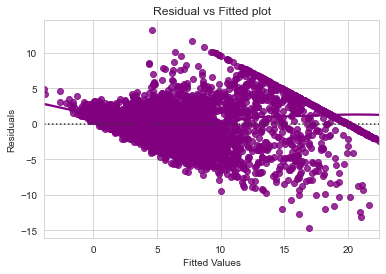

In [72]:
residual = olsres5.resid
fitted = olsres5.fittedvalues  # predicted values

# Create plot
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

It may show a pattern but it's not clear

### Test of Normality
Error terms/Residuals should be normally distributed

C:\Users\ylapin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


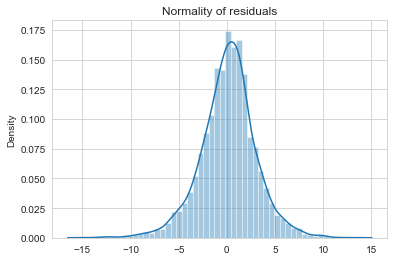

In [73]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

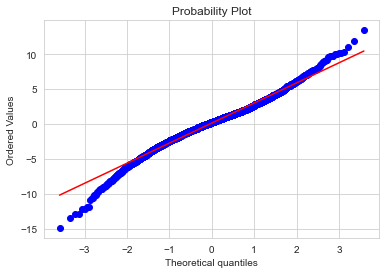

In [74]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

QQ plots following a line prove the normality of the residual distribution.   
Shapiro test is not good for big datasets.    



### Test for Homoscedasticity 
If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.  
If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. 

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, x_train4)
lzip(name, test)

[('F statistic', 0.9131870342415936), ('p-value', 0.9809033237812284)]

P-value > 0.05 , residuals are homoscedastic.


# <a name='link11'>Conclusions and wrap up</a>

### Let predicting on the test data

In [76]:
# Selecting columns from test data that we used to create our final model
x_test_final = x_test[x_train5.columns]

In [77]:
x_test_final.head()

,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Manufacturer_name_Tata,Manufacturer_name_Toyota,Manufacturer_name_Volkswagen,Manufacturer_name_Volvo,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
6001,91903,1768.0,174.33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4366,78233,260.0,98.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2603,74213,1484.0,170.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,69000,0.0,165.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4811,28599,1655.0,105.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
# Checking model performance on train set (seen 0.7 of the data)
print("Train Performance is\n")
model_perf(olsres5, x_train5.values, y_train)

Train Performance is



,MAE,MAPE,RMSE,R^2
0,2.170691,43.230454,2.900855,0.748878


In [79]:
# Checking model performance on test set (seen 0.3 of the data)
print("Test Performance is\n")
model_perf(olsres5, x_test_final.values, y_test)

Test Performance is



,MAE,MAPE,RMSE,R^2
0,2.138122,43.450935,2.916625,0.739586


Insight :
    
    - The model is not suffering from overfitting.
    
    - The R^2 is able to explain ~74% of the variation on the test set, which is good but not excellent.

    - The MAPE continues to be high 43% .
    
    - Both high MAE ~2.13 and RMSE ~2.9 shows indication of high value errors. so we need to improve the model.

In [80]:
# Print the model summary

olsmod5 = sm.OLS(y_train, x_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              8468.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:25:52   Log-Likelihood:                         -10388.
No. Observations:                4182   AIC:                                  2.079e+04
Df Residuals:                    4177   BIC:                                  2.082e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ylapin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Final summary 

Model 5 conclusions: 
 - Kilometers driven impact negatively, fewer kilometers the price is higher. It's having the higher impact on price. 
 - Another factor reducing the price if the transmission is manual or the car uses petrol vs. other fuels. 
 - Power is having a positive impact, it increases the price.
 - Model 5 predicts ~91% of the price.


